## ASSIGNMENT 3

## Linear models for classification problems

Classification — The act of dividing an input space into a collection of labelled regions using decision boundaries. 

Linear Approach — Use of a straight line to partition a dataset. Intuitively this is easiest in terms of both describing the partition (“If it falls on one side of the line class as A, if it falls on the side class as B”) and performing the cut [1]. 

An example of discriminative training of linear classifiers is Logistic Regression [2].

Logistic regression—maximum likelihood estimation of $\vec{\mathbf{w}}$ assuming that the observed training set was generated by a binomial model that depends on the output of the classifier.

This assignment has 2 parts as follows:

**Part 1.** You will implement your own classifier for **Logistic Regression** (50 points) for 2 class classification using the dataset provided for Part 1 (pls. check the shared files). Check the performance of this algorithm with the classification accuracy.

**Part 2.** You will implement your own **Multinomial Logistic Regression** (50 points) classifier for multiclass data. The multinomial logistic regression algorithm is an extension to the logistic regression model that involves changing the loss function to cross-entropy loss and predicting the probability distribution as a multinomial probability distribution to natively support multi-class classification problems [3]. Check the performance of this algorithm with the classification accuracy.

**_Preprocessing the datasets_**:

**Encoding**

Machine learning models require all input and output variables to be numeric.

This means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model. You can use One-Hot Encoding is available in the scikit-learn Python machine learning library via the OneHotEncoder class[4]. 

**Data standardization [5]**

Many machine learning algorithms perform better when numerical input variables are scaled to a standard range. One of the most popular techniques for scaling numerical data prior to modeling is standardization. 

Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values ($\mu$) is 0 and the standard deviation ($\sigma$) is 1. A value is standardized as follows:

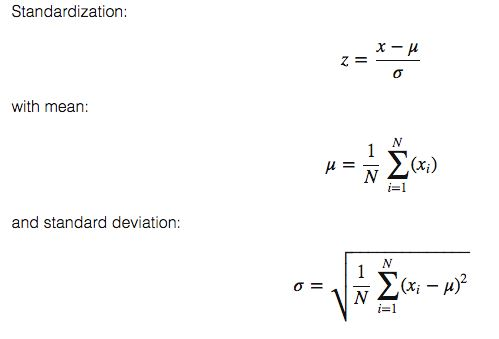

This can be thought of as subtracting the mean value or centering the data.

**Important Remarks:**

You are provided the necessary preprocessing codes as separate notebooks for both datasets that you are going to work with in this assignment. Please check the shared notebooks first before beginning to work with your own algorithms. Note that, in these notebooks, you are also provided with the binary and multinomial logistic regression performances of  of the sklearn library as a baseline for your own implementations. You will be implementing your own solutions that comprise of the necessary training procedures and the codes to train your models for each part before submission.  

**Steps for all parts:**

- Check the data has any null values or not. 
- Check if in the data, some of our columns have numeric values and some of them have categorical values.  To work with categorical variables you need to encode them to prepare this data for the machine learning algorithms.
- Split your data into train and test sets with a ratio of 80:20 with seed=1.
- Apply the data standardization technique to the datasets to standardize the input variables.
- Build your models with your own implemenation (with proper comments and explanations) using the training set.
- Report these classification models according to their accuracy over the test set. Comment on their classification performance.
- Finally, plot confusion matrices for your models over the test set, and comment on the outcomes.



[1]: https://towardsdatascience.com/classification-a-linear-approach-part-1-b080c13992dd

[2]: https://en.wikipedia.org/wiki/Linear_classifier

[3]: https://machinelearningmastery.com/multinomial-logistic-regression-with-python/

[4]: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

[5]: https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

In [1]:
# Code here for data loading and preprocessing (You can enlarge the cell as much as you want.)
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import Normalizer

from sklearn.preprocessing import (FunctionTransformer, StandardScaler)

from collections import Counter
#data reading
data1 = pd.read_csv('Part1_Invistico_Airline.csv')

#Prepare data 1
data1.isna().sum()
data1['Arrival Delay in Minutes'] = data1['Arrival Delay in Minutes'].fillna(data1['Arrival Delay in Minutes'].median())


def object_cols(df):
    return list(df.select_dtypes(include='object').columns)

def numerical_cols(df):
    return list(df.select_dtypes(exclude='object').columns)

obj_col = object_cols(data1)
num_col = numerical_cols(data1)

le = LabelEncoder()

for col in obj_col:
    data1[col] = le.fit_transform(data1[col])
    
norm = Normalizer()
data1[num_col] = norm.fit_transform(data1[num_col])

# Prepare the data2

In [2]:
#reading part2 data
data2 = pd.read_csv('Part2_glass.csv')
X2 =data2.drop(['Type'], axis = 1)
Y2 = data2["Type"]

#checking data types to look there is need any changes about the data types
data2.dtypes
#there are any non-numerical data types so there are no need to change

#checking there are any null values
data2.isna().sum()
#there are any null value so we dont need to handle that too

#handling  with the outliers
#outliers: the value that is considerably higher or lower from rest of the data
#Lets say value at 75% is Q3 and value at 25% is Q1.
#Outlier are smaller than Q1 - 1.5(Q3-Q1) and bigger than Q3 + 1.5(Q3-Q1). (Q3-Q1) = IQR 
#We will use describe() method. Describe method includes:
data2.describe()
#We are define some sub dataset to clean data
outlier_col_indeces = []
# iterate over features(columns)
for col in X2:
    step = 1.5 * (np.percentile(data2[col],75) - np.percentile(data2[col], 25))
    outlier_col = data2[(data2[col] < np.percentile(data2[col], 25) - step) | (data2[col] > np.percentile(data2[col],75) + step )].index
    # append the found outlier indices for col to the list of outlier indices 
    outlier_col_indeces.extend(outlier_col)
        
    # select observations containing more than 2 outliers
outlier_col_indeces = Counter(outlier_col_indeces)        
delete_col = list( k for k, v in outlier_col_indeces.items() if v > 2 )
    
data2 = data2.drop(delete_col).reset_index(drop=True)


X2 =data2.drop(['Type'], axis = 1)
Y2 = data2["Type"]

#We need to standartize our data 
trans = StandardScaler()
X2 = trans.fit_transform(X2)
# convert the array back to a dataframe
X2 = pd.DataFrame(X2)
data2 = pd.concat([X2,Y2],axis = 1)
data2

,0,1,2,3,4,5,6,7,8,Type
0,-1.084334,-0.840893,0.365244,1.619659,0.386817,0.997769,-0.959211,-0.257351,-0.622021,2
1,0.518803,0.455155,0.384185,-1.779009,0.016673,-1.292021,0.133636,0.189691,1.758817,3
2,1.203864,0.676431,-0.809066,0.230638,-1.146637,0.133698,1.273999,-0.257351,1.064406,2
3,0.173942,0.012602,0.280012,0.230638,-0.670737,0.220105,-0.210848,-0.257351,-0.622021,2
4,1.143280,0.312905,-0.989000,0.939925,-0.811745,0.306512,0.941393,0.547324,1.064406,2
...,...,...,...,...,...,...,...,...,...,...
143,0.118018,0.455155,0.696702,-0.242220,-1.199515,0.349716,-0.543454,-0.257351,2.552430,2
144,-0.278105,-1.172808,0.431536,-0.124005,1.144731,0.522530,-0.329636,-0.257351,-0.622021,1
145,-1.093654,-0.366729,0.261071,0.673943,1.091854,-1.680853,-0.460303,-0.257351,1.262809,2
146,0.136660,1.166400,-0.894298,0.910372,0.051925,-1.983278,0.644424,-0.257351,-0.622021,6


cost after  0 iteration is :  0.6931471805599453
cost after  100 iteration is :  0.6001787565931624
cost after  200 iteration is :  0.5814157435963802
cost after  300 iteration is :  0.575475607687114
cost after  400 iteration is :  0.5731583702971473
cost after  500 iteration is :  0.5721327486499544
cost after  600 iteration is :  0.5716354442637602
cost after  700 iteration is :  0.5713732807942337
cost after  800 iteration is :  0.571221447697325
cost after  900 iteration is :  0.5711232470617238


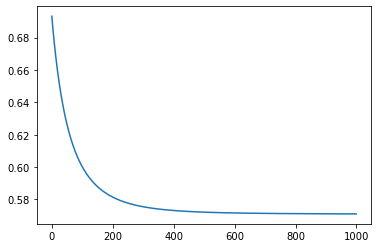

Accurate Classification Ratio =  0.7464992060054858


In [5]:
# Code here for Logistic Regression (You can enlarge the cell as much as you want.)

#We decide iterations and learning rate here
iterations = 100
learning_rate = 0.5


#We split our train and test data
#I choose %80 of the data with random selection method for train and then drop the selected values for test data
train = data1.sample(frac = 0.8,random_state=42)
test = data1.drop(train.index)
#Splitting X and Y values 
X_train = train.drop(['satisfaction'], axis = 1)
X_test = test.drop(['satisfaction'], axis = 1)
Y_train = train['satisfaction']
Y_test = test['satisfaction']


#Changing frames to their values so we can reshape them
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values

#Reshaping the data so we can do linear algebra without any problem
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

#I am predefine sigmoid function so we can use it like a util
def sigmoid(x):
    return 1/(1 + np.exp(-x))

#Our logistic regression model
def LogisticRegression(X, Y, learning_rate, iterations):
    
    #m is number of items in the dataframe
    m = X_train.shape[1]
    #n is number of features
    n = X_train.shape[0]
    
    #In the beginning fill our weight array with zeros
    W = np.zeros((n,1))
    
    #We initilize value 0 for start
    B = 0
    
    #I am defining a cost array so we can see cost changes step by step
    cost_list = []
    
    #With iteration we can choose how many step we want
    for i in range(iterations):
        
        #A = sigmoid(W.T * X + b)
        A = sigmoid(np.dot(W.T, X) + B)
        
        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        
        # Gradient Descent algorithms works in here
        #dW = dcost/dw
        dW = (1/m)*np.dot(A-Y, X.T)
        
        #dB = dcost/db
        dB = (1/m)*np.sum(A - Y)
        
        #We are updating the W in here
        W = W - learning_rate*dW.T
        
        #We are updating B in here
        B = B - learning_rate*dB
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        #in some steps our algorithm shows us the cost values
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
            
        
    return W, B, cost_list


W, B, cost_list = LogisticRegression(X_train, Y_train, learning_rate = learning_rate, iterations = iterations)

#Plotting the relationship between cost and iterations
plt.plot(np.arange(iterations), cost_list)
plt.show()


def AccuracyTest(X, Y, W, B):
    
    true_detected_count = 0;
    A = sigmoid(np.dot(W.T, X) + B)
    
    #We deciding a treshhold value so if the value is bigger then this value it take value 1 else 0
    A = A > 0.5
    
    #A is a boolean value now so we transform it to an int
    A = np.array(A, dtype = 'int64')
    
    #We calculate the accuracy value
    accuracy = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])
    true_detected_count = (Y.shape[1]*accuracy);
    print("Accurate Classification Ratio = ",accuracy)

#We are using test datas to calculate accuracy value
AccuracyTest(X_test, Y_test, W, B)


#We have 0.74 accuracy which not perfect but some testes i made we cant increase the accuracy more.
#smaller learnıng rate or more iterative processes wont give any progress for us on this ata

In [4]:
# Code here Multinomial Logistic Regression (You can enlarge the cell as much as you want.)


#We split our train and test data
#I choose %80 of the data with random selection method for train and then drop the selected values for test data
train2 = data2.sample(frac = 0.8,random_state=42)
test2 = data2.drop(train2.index)
#We create 7 dataset for 7 different classes later on I will explain why we create 7 dataset
D1 = train2.copy();D2 = train2.copy();D3 = train2.copy();D4 = train2.copy();D5 =train2.copy();D6 = train2.copy();D7 = train2.copy();
#Lets put them into an array
datasets = [D1,D2,D3,D4,D5,D6,D7]
#In here we are using our datasets as a one class classifier and for all the datasets We are setting type 1 or 0 
#If and data belongs to class 2 and we are in D2 we are setting type 1 else type is equal to 0 and we are doing this for all the datasets
for i in range(7):
     datasets[i]["Type"] =[1 if k == i + 1 else 0 for k in datasets[i]["Type"]]
        

#We decide iterations and learning rate here we give a huge value to iterations2 because it find optimal value for itself and need space for that
iterations2 = 2000
learning_rate2 = 0.05


#Train_datadict['key'][0] ==> X && Train_datadict['key'][1] ==> y
Train_datadict = {}  

X_test2 = test2.iloc[:,:9]
X_test2 = X_test2.T
y_test2 = test2.iloc[:,-1]
y_test2 = np.array([y_test2])
for i in range(7):
    #Splitting X and Y values 
    X_train2 = datasets[i].iloc[:,:9]
    X_train2 = X_train2.T
    y_train2 = datasets[i].iloc[:,-1]
    y_train2 = np.array([y_train2])
    
    Train_datadict['D'+str(i+1)] = [X_train2,y_train2]  
    
    
#We keep all the weight and bias parameters for different classes    
trained_parameters = []
#We keep all the cost values for different classes
cost_values = []

#Our logistic regression model
def LogisticRegression2(X, Y, learning_rate, iterations):
    
    #m is number of items in the dataframe
    m = X_train2.shape[1]
    #n is number of features
    n = X_train2.shape[0]
    
    #In the beginning fill our weight array with zeros
    W = np.zeros((n,1))
    
    #We initilize value 0 for start
    B = 0
    
    #I am defining a cost array so we can see cost changes step by step
    cost_list = []
    
    #With iteration we can choose how many step we want
    for i in range(iterations):
        
        #A = sigmoid(W.T * X + b)
        A = sigmoid(np.dot(W.T, X) + B)
        
        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        
        # Gradient Descent algorithms works in here
        #dW = dcost/dw
        dW = (1/m)*np.dot(A-Y, X.T)
        
        #dB = dcost/db
        dB = (1/m)*np.sum(A - Y)
        
        #We are updating the W in here
        W = W - learning_rate*dW.T
        
        #We are updating B in here
        B = B - learning_rate*dB
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        #in some steps our algorithm shows us the cost values
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
            
        #I decide a minimum cost value if the cost value reach that values training can be over in this way we can keep 
        #iteration value flexible it is needed because for every class it should has a different value
        if(len(cost_list)>5):
            if i%2000 == 0:
              print('running @ ',cost)
            if i%2 == 0:
              if abs(cost-cost_list[-2])<0.00001:
                if abs(cost-cost_list[-3])<0.00001:
                  break 
    return W, B, cost_list

print("---------------------------------------------------------------------")
#In here we take the test data and calculate probabilities for all the classes and pick the max prob as their class
#and then control it with the original result to calculate our accuracy
def AccuracyTest2(X_test2, Y_test2,dataset):
    Y_test2 = np.array(Y_test2)
    #We define a variable to keep accurate predicts counts
    accuratepredicts = 0                
    for i in range(X_test2.shape[0]):
        probabilities = []
        predict = 0
        #7 is the how many glass type we have
        for j in range(7):
            #I am taking glasses one by one reshape them for multiplication and calculate probability value
            b = X_test2.iloc[:,i].values.reshape((9,1))
            W = trained_parameters[j][0]
            B = trained_parameters[j][1]
            z = np.dot(W.T,b)+B
            A = 1/(1 + np.exp(-z)) 
            probabilities.append(A)
        #I am adding the index one because my copy dataframes start from 1 not 0
        predict = probabilities.index(max(probabilities)) + 1
        #Here we check if can we found the true class
        if Y_test2.T[i] == predict:
            accuratepredicts+=1
            
    return  accuratepredicts

#We train models for all the glass type in here with using our copied dataframes
for i in range(1,8):
    print("Model is training for class ",i)
    W ,B , cost_list = LogisticRegression2(Train_datadict['D'+str(i)][0] ,Train_datadict['D'+str(i)][1], learning_rate = learning_rate2, iterations = iterations2)
    trained_parameters.append([W,B])
    cost_values.append(cost_list)
  
print("---------------------------------------------------------------------")
    
#We calculate accuracy here
accuracy = AccuracyTest2(X_test2, y_test2,i)
#We take the accurate predict count and divided it into all the variable counts
accuracy = accuracy/X_test2.shape[0]
print("accuracy rating is : ",accuracy)


#We have 0.55 accuracy in here which is not so good but we know with sckitlearn we can take 0.64 accuracy 
#which is close 0.64 but a little bad thought but i couldn't increase this value more.    

---------------------------------------------------------------------
Model is training for class  1
cost after  0 iteration is :  0.6931471805599454
cost after  200 iteration is :  0.5128542109862932
cost after  400 iteration is :  0.4940237376738528
cost after  600 iteration is :  0.48730985918724135
cost after  800 iteration is :  0.48389473305396735
cost after  1000 iteration is :  0.48176657555996394
cost after  1200 iteration is :  0.4802772522142651
Model is training for class  2
cost after  0 iteration is :  0.6931471805599454
cost after  200 iteration is :  0.5082273520877489
cost after  400 iteration is :  0.4891026741048816
cost after  600 iteration is :  0.48236574948823047
cost after  800 iteration is :  0.4790262218656026
cost after  1000 iteration is :  0.4770314829610294
cost after  1200 iteration is :  0.47570436414230227
Model is training for class  3
cost after  0 iteration is :  0.6931471805599454
cost after  200 iteration is :  0.3066192740279702
cost after  400 it